In [54]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import torch.nn as nn

In [55]:
X = torch.linspace(1,50,50).reshape(-1,1)

In [56]:
X.shape

torch.Size([50, 1])

In [57]:
torch.manual_seed(71)
e = torch.randint(-8,9,(50,1),dtype=torch.float)#50 rows by 1 col

In [58]:
y = 2*X +1 + e #true function

In [59]:
y.shape

torch.Size([50, 1])

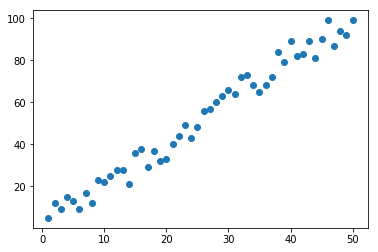

In [60]:
plt.scatter(X.numpy(),y.numpy()) #create a plot

In [61]:
torch.manual_seed(59)
model = nn.Linear(in_features=1,out_features=1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [62]:
#important! 
class Model(nn.Module):
    def __init__(self,in_features,out_features):
        super().__init__()
        self.linear = nn.Linear(in_features,out_features)
        #load the type of layers plus parameters
        
    def forward(self,x):
        y_pred = self.linear(x)
        return y_pred
        #pass the variable

In [63]:
torch.manual_seed(59)
model = Model(1, 1)
print(model.linear.weight)
print(model.linear.bias)
print('\n')
print(model) #check the model structure: important! 

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


Model(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [64]:
for name,param in model.named_parameters():
    print(name,'\t',param.item()) 

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [65]:
x = torch.tensor([2.0]) #the x used in the model
print(model.forward(x)) #check forward

tensor([1.1758], grad_fn=<AddBackward0>)


In [66]:
x1 = np.linspace(0.,50.,50)
x1

array([ 0.        ,  1.02040816,  2.04081633,  3.06122449,  4.08163265,
        5.10204082,  6.12244898,  7.14285714,  8.16326531,  9.18367347,
       10.20408163, 11.2244898 , 12.24489796, 13.26530612, 14.28571429,
       15.30612245, 16.32653061, 17.34693878, 18.36734694, 19.3877551 ,
       20.40816327, 21.42857143, 22.44897959, 23.46938776, 24.48979592,
       25.51020408, 26.53061224, 27.55102041, 28.57142857, 29.59183673,
       30.6122449 , 31.63265306, 32.65306122, 33.67346939, 34.69387755,
       35.71428571, 36.73469388, 37.75510204, 38.7755102 , 39.79591837,
       40.81632653, 41.83673469, 42.85714286, 43.87755102, 44.89795918,
       45.91836735, 46.93877551, 47.95918367, 48.97959184, 50.        ])

In [67]:
W1 = 0.1059
b1 = 0.9637
y1 = W1*x1 + b1
y1

array([0.9637    , 1.07176122, 1.17982245, 1.28788367, 1.3959449 ,
       1.50400612, 1.61206735, 1.72012857, 1.8281898 , 1.93625102,
       2.04431224, 2.15237347, 2.26043469, 2.36849592, 2.47655714,
       2.58461837, 2.69267959, 2.80074082, 2.90880204, 3.01686327,
       3.12492449, 3.23298571, 3.34104694, 3.44910816, 3.55716939,
       3.66523061, 3.77329184, 3.88135306, 3.98941429, 4.09747551,
       4.20553673, 4.31359796, 4.42165918, 4.52972041, 4.63778163,
       4.74584286, 4.85390408, 4.96196531, 5.07002653, 5.17808776,
       5.28614898, 5.3942102 , 5.50227143, 5.61033265, 5.71839388,
       5.8264551 , 5.93451633, 6.04257755, 6.15063878, 6.2587    ])

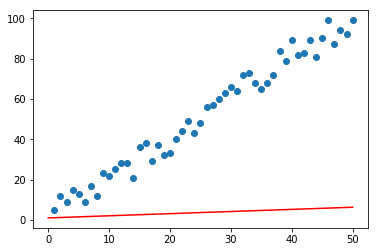

In [68]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(x1,y1,'r')

In [69]:
criterion = nn.MSELoss() #define loss function

In [70]:
optimizer = torch.optim.SGD(model.parameters(),lr=0.001)

In [71]:
#important!
epochs = 50
losses = []

for i in range(epochs):
    i = i+1
    #output the predicted y
    y_pred = model.forward(X)
    #loss function
    loss = criterion(y_pred,y)
    #record errors
    losses.append(loss)
    print(f"epoch: {i} loss: {loss.item()} weight: {model.linear.weight.item()} bias: {model.linear.bias.item()}")
    
    #adjusting weights and bias
    optimizer.zero_grad()#reset the gradient in each epoch
    loss.backward()#backpropagation
    optimizer.step()#update the hyperparameters using lr

epoch:  1 loss: 3057.216796875 weight: 0.10597813129425049 bias: 0.9637961387634277
epoch:  2 loss: 1588.531005859375 weight: 3.334900379180908 bias: 1.0604636669158936
epoch:  3 loss: 830.3001098632812 weight: 1.0148327350616455 bias: 0.9922627806663513
epoch:  4 loss: 438.8524169921875 weight: 2.6817996501922607 bias: 1.0425218343734741
epoch:  5 loss: 236.7615203857422 weight: 1.4840211868286133 bias: 1.0076650381088257
epoch:  6 loss: 132.4291229248047 weight: 2.3446059226989746 bias: 1.0339646339416504
epoch:  7 loss: 78.56572723388672 weight: 1.7262253761291504 bias: 1.0163217782974243
epoch:  8 loss: 50.75775909423828 weight: 2.170504093170166 bias: 1.0302516222000122
epoch:  9 loss: 36.4012336730957 weight: 1.8512457609176636 bias: 1.0214954614639282
epoch: 10 loss: 28.989227294921875 weight: 2.0806007385253906 bias: 1.029038906097412
epoch: 11 loss: 25.162382125854492 weight: 1.9157683849334717 bias: 1.0248701572418213
epoch: 12 loss: 23.186473846435547 weight: 2.0341656208038

Text(0.5, 0, 'EPOCH ')

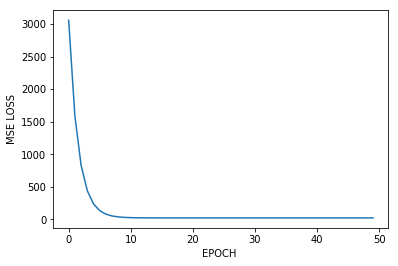

In [72]:
#more visualization
plt.plot(range(epochs),losses)
plt.ylabel('MSE LOSS')
plt.xlabel('EPOCH ')


In [73]:
x = np.linspace(0.0,50,50)
current_weight = model.linear.weight.item()
current_bias = model.linear.bias.item()

predicted_y = current_weight*x + current_bias

In [75]:
predicted_y

array([  1.05575156,   3.08005679,   5.10436203,   7.12866726,
         9.15297249,  11.17727772,  13.20158295,  15.22588818,
        17.25019342,  19.27449865,  21.29880388,  23.32310911,
        25.34741434,  27.37171957,  29.39602481,  31.42033004,
        33.44463527,  35.4689405 ,  37.49324573,  39.51755096,
        41.5418562 ,  43.56616143,  45.59046666,  47.61477189,
        49.63907712,  51.66338236,  53.68768759,  55.71199282,
        57.73629805,  59.76060328,  61.78490851,  63.80921375,
        65.83351898,  67.85782421,  69.88212944,  71.90643467,
        73.9307399 ,  75.95504514,  77.97935037,  80.0036556 ,
        82.02796083,  84.05226606,  86.07657129,  88.10087653,
        90.12518176,  92.14948699,  94.17379222,  96.19809745,
        98.22240268, 100.24670792])

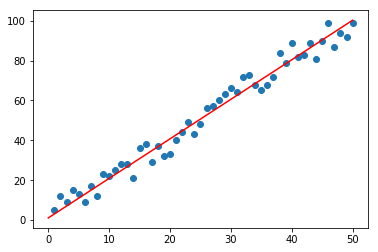

In [76]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(x,predicted_y,'r')